<a href="https://colab.research.google.com/github/FunmiSomoye/School-Projects/blob/master/Predict_airfoil_self_noise_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HLT Group_C
Raphael Ozioko
Tobechukwu Asem
Oluwafunmilayo Somoye

# Group assignment

We investigate data on airfoil designs for aircraft. An airfoil is a the shape of a blade, wing or blade (of a turbine, propeller, rotor).
The data is on self-generated noise of an airfoil blade encountering smooth flow. A series of aerodynamic and acoustic tests were conducted in an anechoic wind tunnel on two- and three-dimensional airfoil blade sections. 
The self-noise is produced when the airfoil blade interacts with the turbulence produced by its boundary layer and its wake over nonturbulent inflow. The experiment studies how noise mechanisms affect operation of the airfoil. 

The data is in the file `airfoil-selfnoise.dat`. The data is from 7 NACA 0012 airfoil blade sections of different sizes (chord lengths from 2.5 to 61 cms) tested at wind tunnel speeds up to Mach 0.21 (Reynold's number based on chord up to $3 \times 10^6$) and at angles of attack from 0° to 22.2°.

So the following information is contained in the file:

    1. Frequency, in Hertzs.
    2. Angle of attack, in degrees.
    3. Chord length, in meters.
    4. Free-stream velocity, in meters per second.
    5. Suction side displacement thickness, in meters.

The target variable:

    6. Scaled sound pressure level, in decibels. 

We'll be investigating how different features interact with sound pressure. As usual, we'll generate summary statistics, visualize data, determining relationships in the data. We'll also apply a simple regression model to predict the sound pressure.

# Explore and visualize the data

We'll use the following online source to help us start on exploring the dataset. 
[Predicting airfoil self-noise using wind tunnel data and machine learning](http://www.datasciencedude.com/2015/05/31/test/). 

#### Import the necessary libraries for data manipulation and visualization; then load the data into a dataframe. Investigate the types of the variables, i.e., are the variables numeric or categoric?

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import random as rnd
from sklearn import linear_model

In [ ]:
%matplotlib inline  

In [ ]:
data = pd.read_csv('airfoil_self_noise.dat', #name of file
                   sep='\t', #column separation
                   names = ['Freq(Hz)', 'Angle(deg)', 'Chord_length(m)', 'Velocity(ms)', 'Thickness(m)', 'Pressure(dec)'])#name the columns

Investigate the type of Variables

First see data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Freq(Hz)           1503 non-null int64
Angle(deg)         1503 non-null float64
Chord_length(m)    1503 non-null float64
Velocity(ms)       1503 non-null float64
Thickness(m)       1503 non-null float64
Pressure(dec)      1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


Look into data

In [ ]:
data.head()

,Freq(Hz),Angle(deg),Chord_length(m),Velocity(ms),Thickness(m),Pressure(dec)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


All data looks simply numeric, but investigate variables to be sure

In [ ]:
print (data['Freq(Hz)'].unique().tolist())

[800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500, 16000, 500, 630, 200, 250, 315, 400, 20000]


In [ ]:
print (data['Angle(deg)'].unique().tolist())

[0.0, 1.5, 3.0, 4.0, 2.0, 5.3, 7.3, 2.7, 5.4, 7.2, 9.9, 12.6, 4.2, 8.4, 11.2, 15.4, 19.7, 4.8, 9.5, 12.7, 17.4, 22.2, 3.3, 6.7, 8.9, 12.3, 15.6]


In [ ]:
print (data['Chord_length(m)'].unique().tolist())

[0.3048, 0.2286, 0.1524, 0.0508, 0.0254, 0.1016]


In [ ]:
print (data['Velocity(ms)'].unique().tolist())

[71.3, 55.5, 39.6, 31.7]


In [ ]:
print (data['Thickness(m)'].unique().tolist())

[0.00266337, 0.00283081, 0.00310138, 0.00331266, 0.00336729, 0.00392107, 0.00425727, 0.00452492, 0.00495741, 0.00529514, 0.00497773, 0.00579636, 0.00214345, 0.00229336, 0.00253511, 0.0027238, 0.00293031, 0.00313525, 0.00346574, 0.00372371, 0.00400603, 0.0042861999999999996, 0.00473801, 0.00509068, 0.0051942, 0.00614329, 0.010440399999999999, 0.011170600000000001, 0.0123481, 0.0132672, 0.0015988, 0.00172668, 0.00193287, 0.00209405, 0.00243851, 0.00294804, 0.00401199, 0.00433288, 0.00485029, 0.00525474, 0.00752039, 0.00909175, 0.019300099999999997, 0.0208438, 0.0233328, 0.0252785, 0.0483159, 0.058411300000000006, 0.000740478, 0.00076193, 0.000791822, 0.000812164, 0.00142788, 0.00152689, 0.00544854, 0.00566229, 0.00580776, 0.014072, 0.015047799999999998, 0.0264269, 0.0271925, 0.0282593, 0.028985300000000002, 0.034118300000000004, 0.036483999999999996, 0.00040068199999999997, 0.00041229, 0.00042846400000000004, 0.000439472, 0.000848633, 0.000873218, 0.000907475, 0.0009307889999999999, 0.00

In [ ]:
print (data['Pressure(dec)'].unique().tolist())

[126.20100000000001, 125.20100000000001, 125.95100000000001, 127.59100000000001, 127.461, 125.571, 123.061, 121.301, 119.541, 117.15100000000001, 115.391, 112.241, 108.721, 126.416, 127.696, 128.086, 126.96600000000001, 126.086, 126.986, 126.616, 124.10600000000001, 123.236, 121.10600000000001, 119.60600000000001, 117.976, 116.476, 113.07600000000001, 111.07600000000001, 118.12899999999999, 119.319, 122.779, 124.809, 126.959, 128.629, 129.099, 127.899, 125.499, 124.04899999999999, 123.689, 121.399, 120.319, 119.229, 117.789, 116.229, 114.779, 112.139, 109.619, 117.195, 118.595, 122.765, 125.045, 127.315, 129.095, 129.235, 127.365, 124.355, 122.365, 122.375, 120.755, 119.135, 118.145, 115.645, 113.775, 110.515, 108.265, 127.12200000000001, 125.992, 125.87200000000001, 126.632, 126.64200000000001, 124.512, 123.39200000000001, 121.762, 119.632, 118.12200000000001, 115.37200000000001, 113.492, 109.22200000000001, 106.58200000000001, 121.851, 124.001, 126.661, 128.311, 128.83100000000002, 1

The Variables are Numeric Variables.

### Feature engineering

Feature engineering is a way to create new features using features already in the dataset. Here we're going to combine two features in the datset with a deterministic relationship between them. We're going to create something called Reynolds number.

#### The case of Reynolds number

Two features in the dataset, namely free stream velocity (m/s) and chord length (m), can be used to determine something called Reynolds number. According to [Wikipedia](https://en.wikipedia.org/wiki/Reynolds_number), Reynolds number, a dimensionaless quantity, is the ratio of internal forces to viscous forces within fluids, like air or water. This experiment is about the dynamics of air flow over an airfoil. Suffice to say, Reynolds number determines different flow patterns in different flow situations. Reynolds number for the chord length $Re$ is calculated as

$$Re = (\text{free stream velocity}) * (\dfrac{\text{chord length}}{\text{kinematic viscosity}}).$$ The kinematic viscousity for air at $27^{\circ}$ is $1.568 \times 10^{-5}$. [Wikipedia says](https://en.wikipedia.org/wiki/Reynolds_number) that "at low Reynolds numbers flow tends to be sheet-like, while at high Reynolds numbers turbulence occurs due to differences in the fluid's speed and direction, which may sometimes intersect or even move counter to the overall direction of the flow".

#### Let's use this information to create a new variable called $Re$ in our dataframe. Check to see that the Reynolds numbers are not greater than $3 \times 10^6$.

In [ ]:
kv = 0.00001568
data['Re'] = data['Velocity(ms)']*(data['Chord_length(m)']/kv)
data.head()

,Freq(Hz),Angle(deg),Chord_length(m),Velocity(ms),Thickness(m),Pressure(dec),Re
0,800,0.0,0.3048,71.3,0.002663,126.201,1.385985e+06
1,1000,0.0,0.3048,71.3,0.002663,125.201,1.385985e+06
2,1250,0.0,0.3048,71.3,0.002663,125.951,1.385985e+06
3,1600,0.0,0.3048,71.3,0.002663,127.591,1.385985e+06
4,2000,0.0,0.3048,71.3,0.002663,127.461,1.385985e+06


## Some visualizations

What can we learn from the data? What are the relationships between the features? What is the relationship between frequency and noise, for instance? Let's plot frequency against noise for different angles. Use the groupby to determine how many angles and their values. Recall that groupby returns a dictionary who's keys are the column used to group by.

#### Consider the frequency and noise level, how they interact. For each angle of attack, plot the frequency against noise levels.  And for each Reynolds number, plot frequency against noise levels. Discuss your observations.

Frequency and Noise levels plots

In [ ]:
#plt.figure(figsize=(20, 40))
#plot_number = 1
#for tl, sl in data.groupby('Angle(deg)'):
 #ax = plt.subplot(7,4, plot_number)
   #sl.plot.scatter(x='Freq(Hz)', y='Pressure(dec)', ax=ax, label=tl, legend=False)
    #ax.set_title(tl)
    ##Go to next plot for the next loop
    #plot_number = plot_number + 1
    #plt.tight_layout() #fits plots tightly together

Plot Frequency against Noise Level by Angle of Attack

In [ ]:
print (data['Angle(deg)'].unique().tolist())

[0.0, 1.5, 3.0, 4.0, 2.0, 5.3, 7.3, 2.7, 5.4, 7.2, 9.9, 12.6, 4.2, 8.4, 11.2, 15.4, 19.7, 4.8, 9.5, 12.7, 17.4, 22.2, 3.3, 6.7, 8.9, 12.3, 15.6]


Text(0.5, 1.02, 'Noise Levels vs Frequency, grouped by Angle of attack')

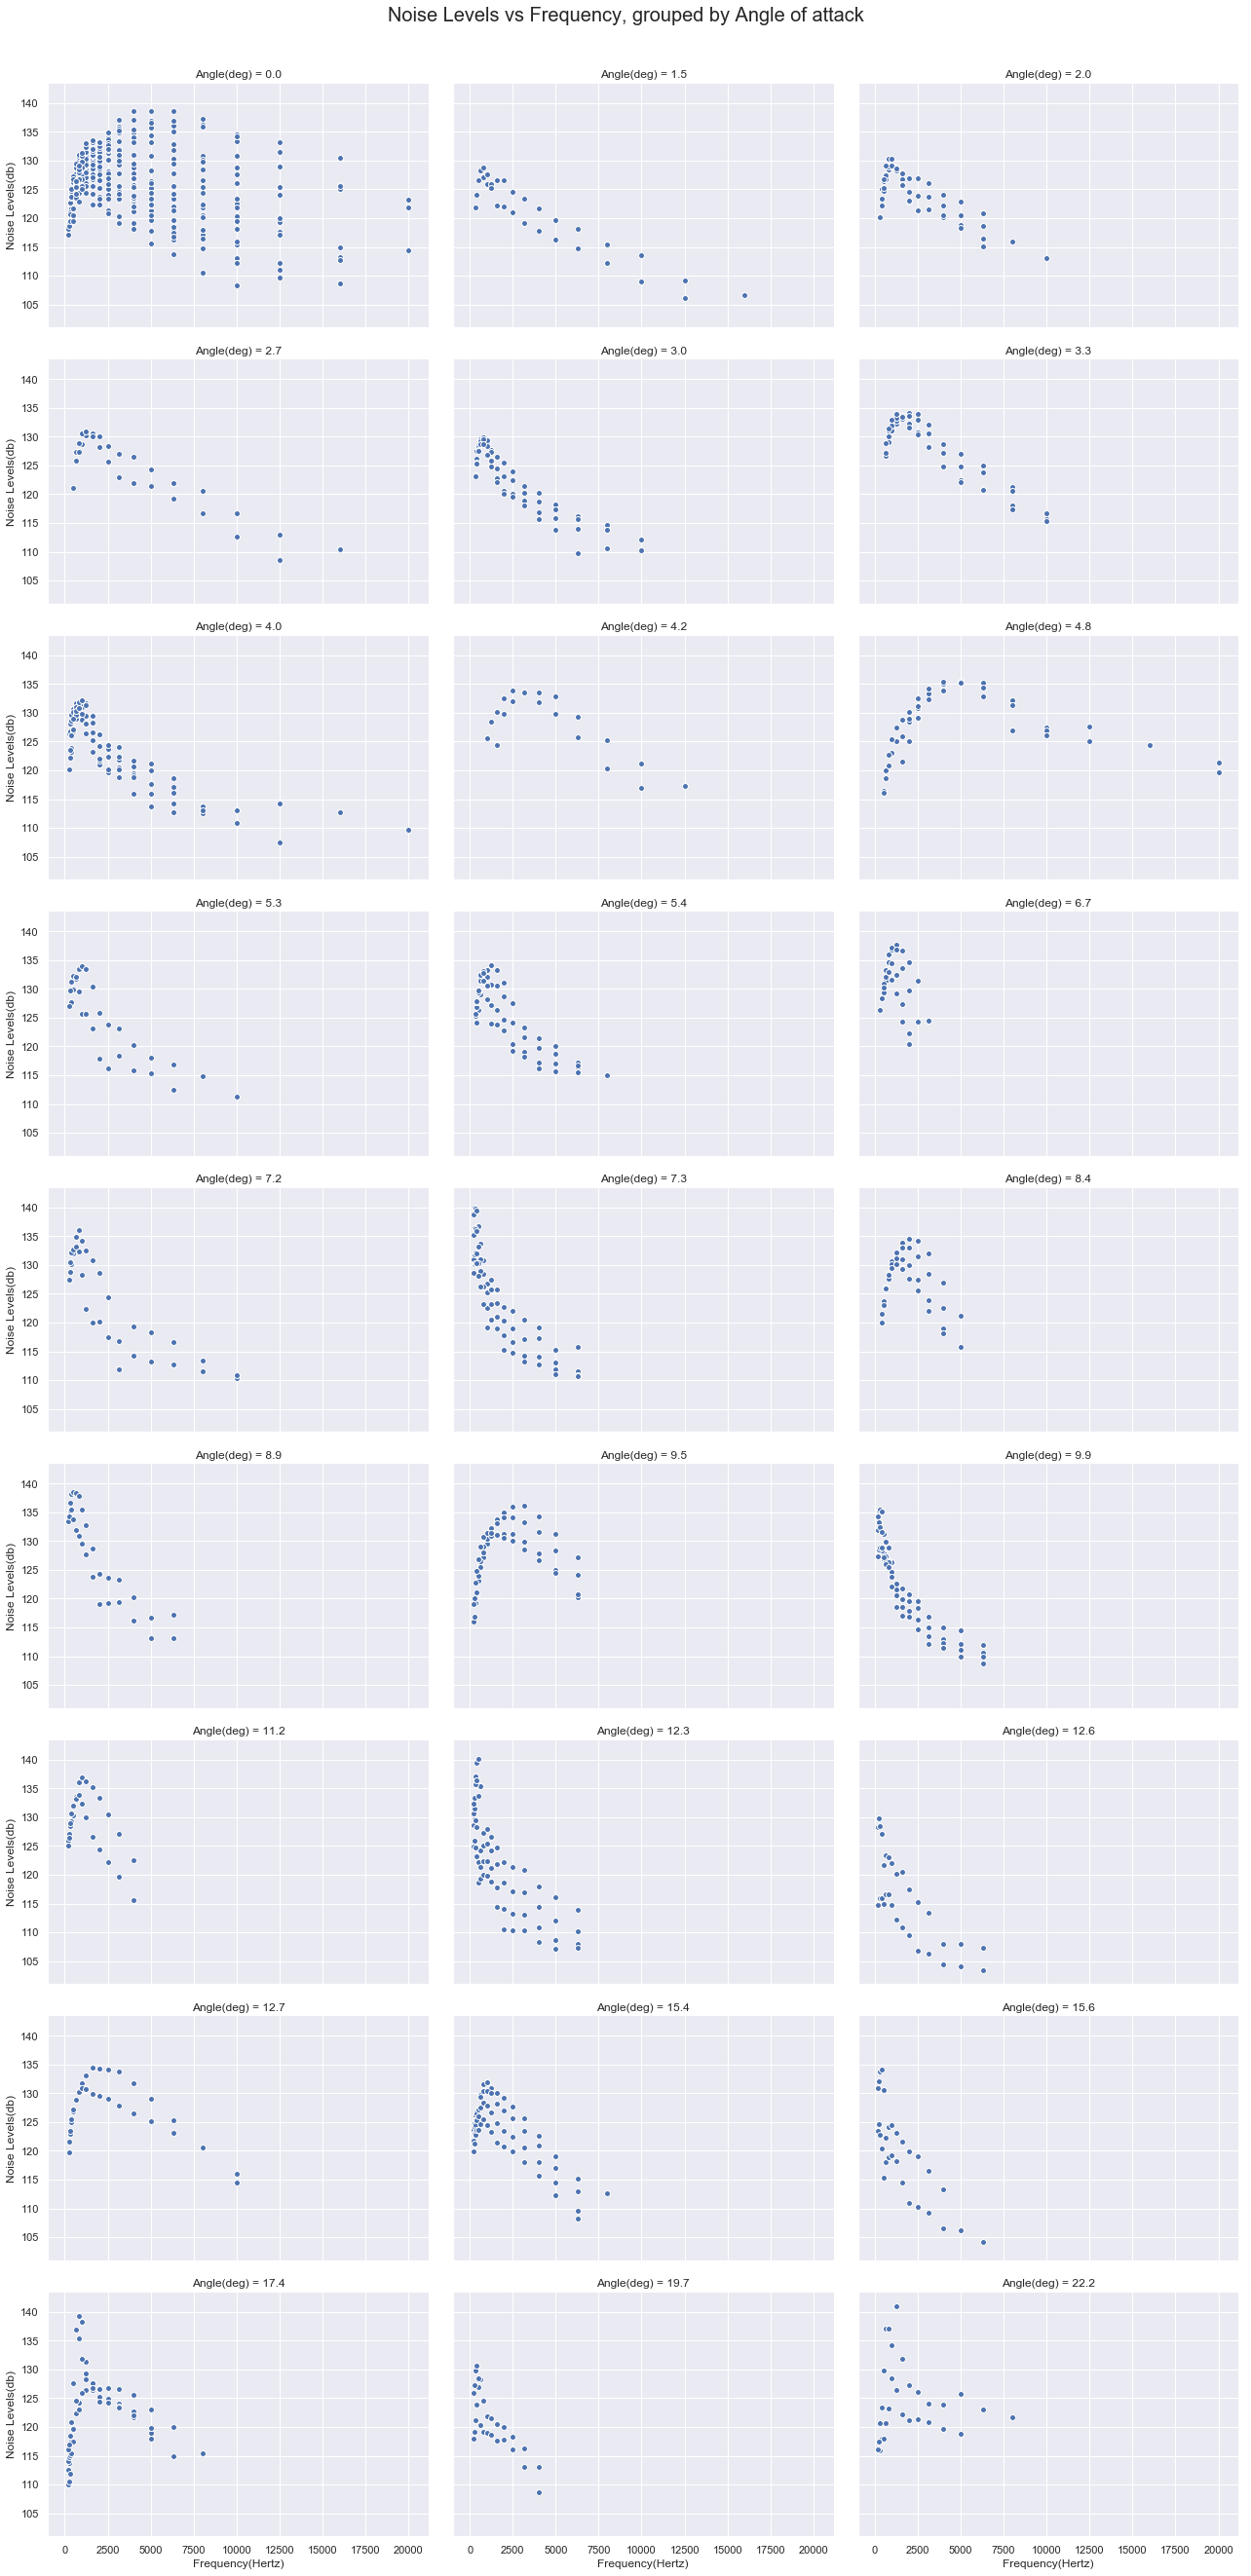

In [ ]:
g = sns.FacetGrid(data, col='Angle(deg)', col_wrap=3, height=4, aspect=1.5)
g = g.map(plt.scatter, 'Freq(Hz)', 'Pressure(dec)', edgecolor="w").set_axis_labels("Frequency(Hertz)", "Noise Levels(db)")
plt.suptitle('Noise Levels vs Frequency, grouped by Angle of attack', 
             size = 20, y=1.02)

Plot Frequency against Noise Level by Reynolds Number

In [ ]:
print (data['Re'].unique().tolist())

Text(0.5, 1.03, 'Noise Levels vs Frequency, grouped by Reynolds Number')

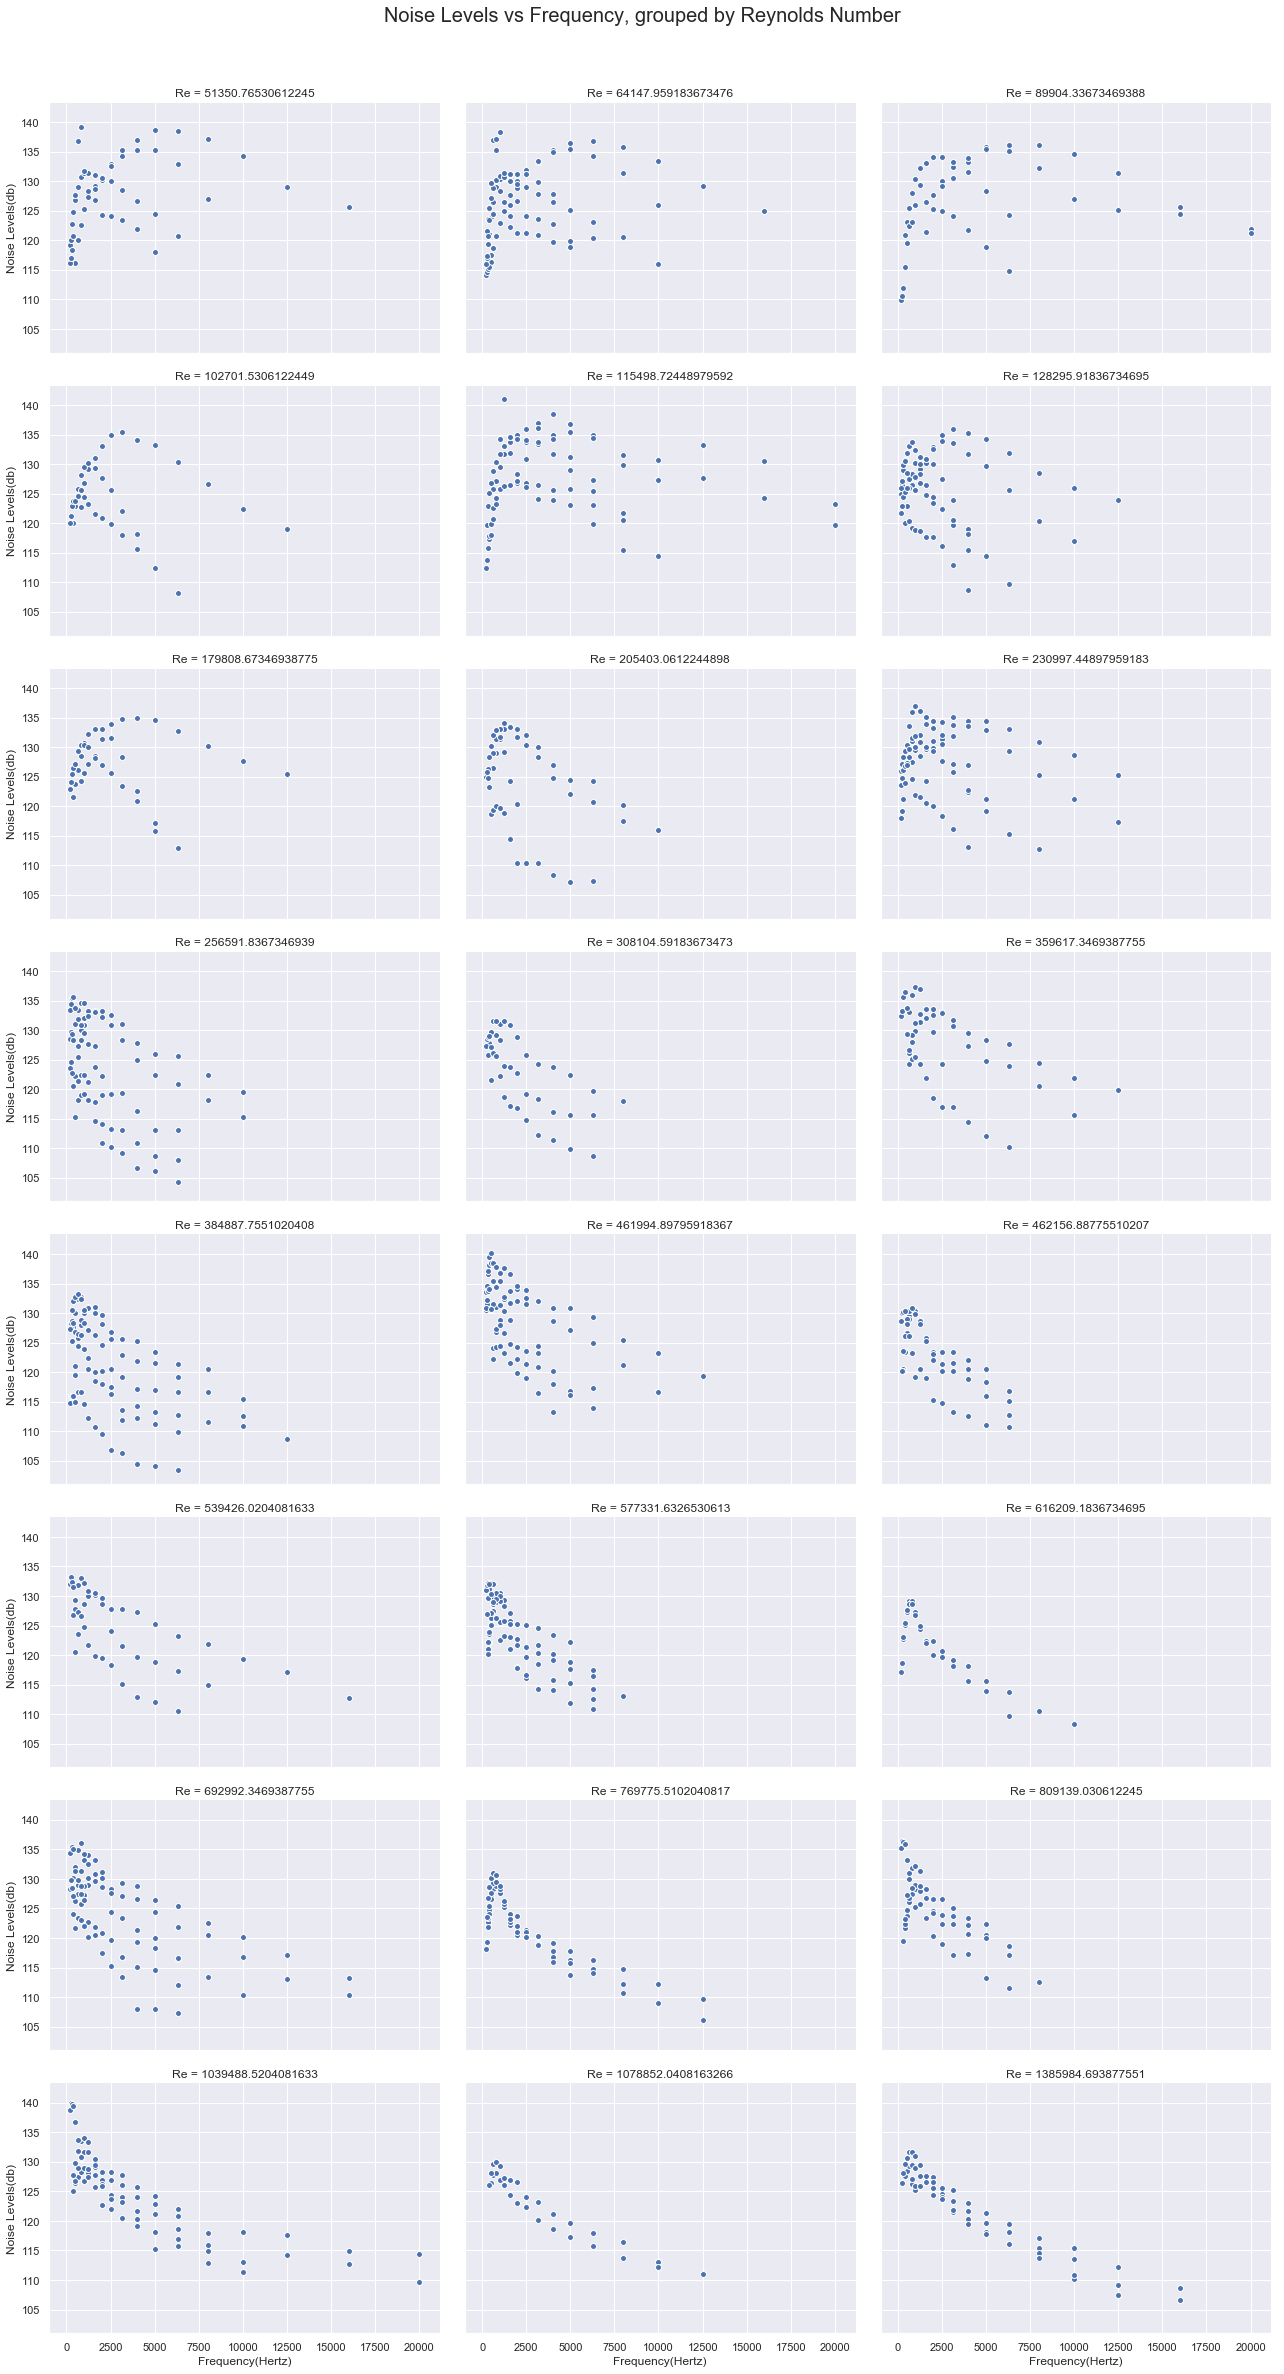

In [ ]:
g = sns.FacetGrid(data, col='Re', col_wrap=3, height=4, aspect=1.5)
g = g.map(plt.scatter, 'Freq(Hz)', 'Pressure(dec)', edgecolor="w").set_axis_labels("Frequency(Hertz)", "Noise Levels(db)")
plt.suptitle('Noise Levels vs Frequency, grouped by Reynolds Number', 
             size = 20, y=1.03)

# Discuss your observations
Generally, 
    The data are right_skewed. 
    The data is right_skewed, and shows that there are lower noise levels as the frequency increases
    
Observations in grouping by Angle of Attack
    At an angle of attack of 0, the data resembles a normally distributed.
    As it increases, the data distrbution of the noise levels vs frequency becomes right-skewed, although there are exceptions as some distribution are negative non-linear
    It seems there was no airfoil tested at higher frequencies at high angles of attack

Observations in grouping by Reynolds Number
    At greater turbulence (high Reynolds number), the air foils generally generate higher noise levels at low frequencies
    As it increases, the data distrbution of the noise levels vs frequency becomes negative non-linear

#### Do more exploration. For example, for the different velocities with attack angle equal to zero and chord length = 0.3048, plot the frequency against noise level? Discuss your observations.

Plot each Velocity in subplots

Text(0.5, 1.03, 'Noise Levels vs Frequency, grouped by Velocity; Attack Angle = 0 and Chord Length = 0.3048')

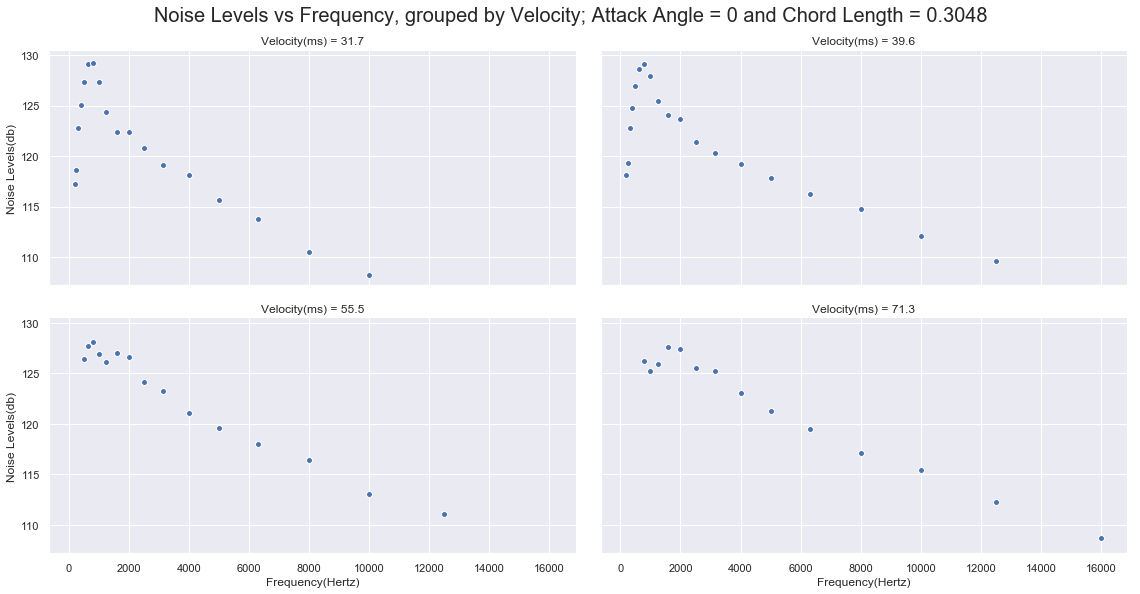

In [ ]:
data2 = data.loc[(data['Angle(deg)'] == 0) & (data['Chord_length(m)'] == 0.3048)]

g = sns.FacetGrid(data2, col='Velocity(ms)', col_wrap=2, height=4, aspect=2)
g = g.map(plt.scatter, 'Freq(Hz)', 'Pressure(dec)', edgecolor="w").set_axis_labels("Frequency(Hertz)", "Noise Levels(db)")
plt.suptitle('Noise Levels vs Frequency, grouped by Velocity; Attack Angle = 0 and Chord Length = 0.3048', 
             size = 20, y=1.03)

Text(0, 0.5, 'Noise Levels (db)')

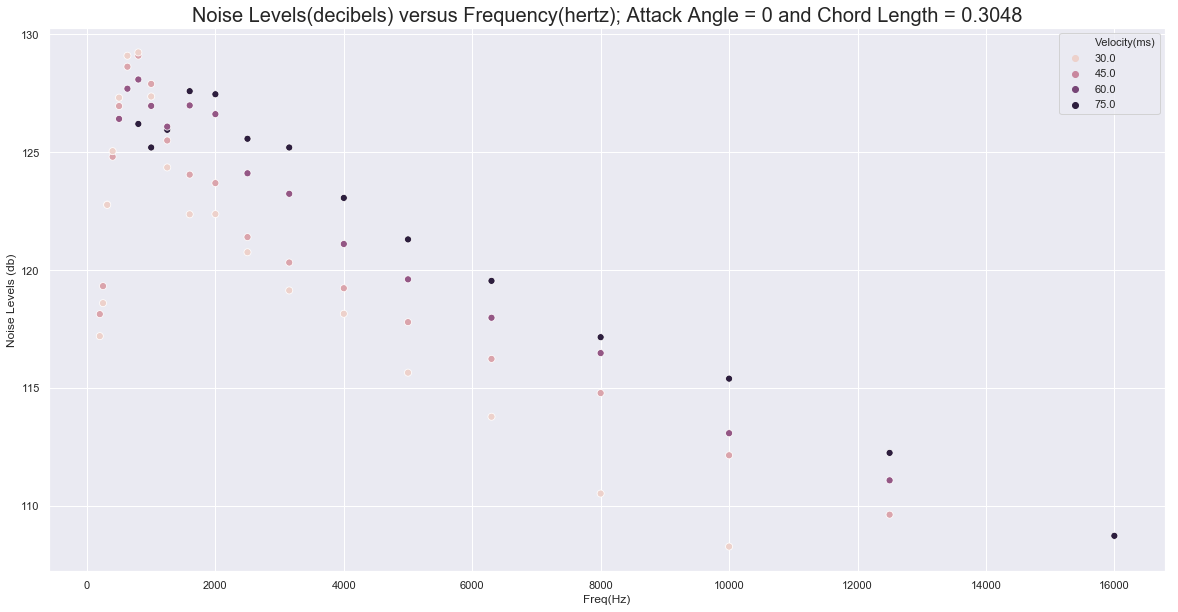

In [ ]:
sns.scatterplot(x='Freq(Hz)', y='Pressure(dec)', hue = 'Velocity(ms)', data=data2, s=50)
plt.title('Noise Levels(decibels) versus Frequency(hertz); Attack Angle = 0 and Chord Length = 0.3048', size=20)
plt.ylabel('Noise Levels (db)')

For Airfoils with Chord length of 0.3048 having an attack angle of 0, the noise levels reduces as the frequency increases.

### Relationships between variables

#### Continue to explore relationships between variables by genearating correlation matrix. Identify which variables are highly correlated.
Whether two variables are highly correlated can still be significant for determining a target variable. Variables can be strongly related but not correlated. For now we use correlation determine those features that are related.

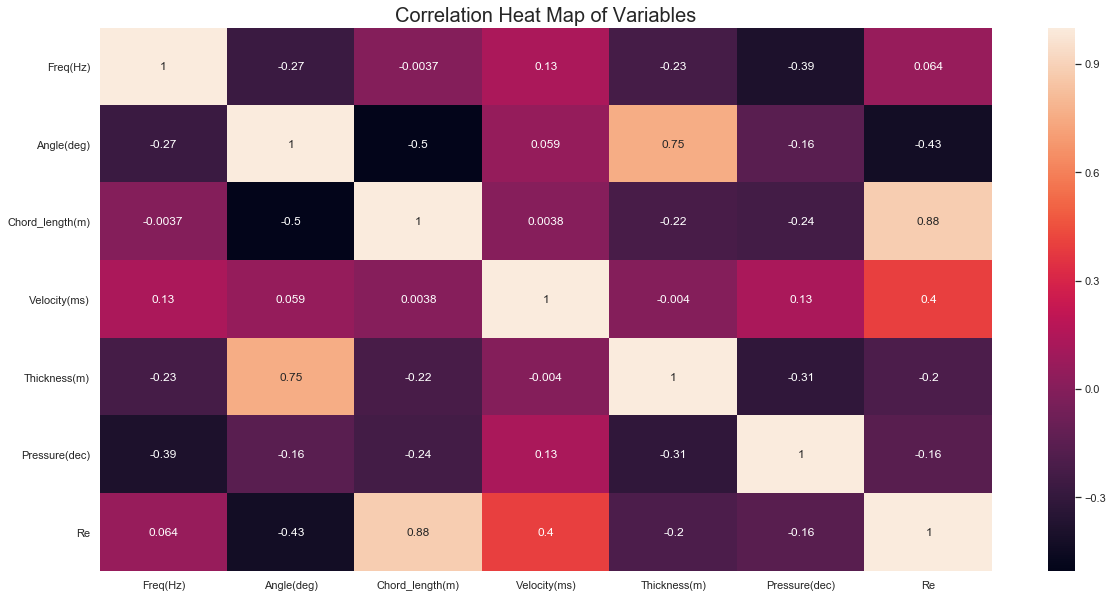

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True) #add annot=True to show correlation values inside heatmap
plt.title('Correlation Heat Map of Variables', size=20)
sns.set(rc={'figure.figsize':(20,10)})

The highly correlated variables are:
    
Positively:
    Angle and Thickness
    Velocity and Reynolds Number

Negatively:
    Angle and Reynolds Number
    Thickness and Noise levels (Pressure)
    Frequency and Noise levels (Pressure)    

## Formulating a hypothesis

In this case we test a simple hypothesis, that the relationship between the thickness of the airfoil shape is related to noise level. Is this relationship significant? The Pearson correlation function from scipy stats performs a test and returns a p-value. Interpret the p-value.

#### Is there a relationship between thickness and noise level signficant?
Visualize this relationship if you so wish.

Null Hypothesis: The thickness of the airfoil shape is related to noise level
Alternative Hypothesis: The thickness of the airfoil shape is not related to noise level

Calculate p-value

In [ ]:
# r- Pearson correlation coefficient
# p - probability of observing a correlation that extreme in the dataset
r, p = scs.pearsonr(data['Thickness(m)'], data['Pressure(dec)'])
print('The Pearson Correlation coefficient is', r)
print('The p-value is', p)

The Pearson Correlation coefficient is -0.31266950627654305
The p-value is 1.9247829560262647e-35


Visualization

Text(0.5, 1.1, 'Noise Levels (in decibels) versus Thickness(in meters) of Air Foils')

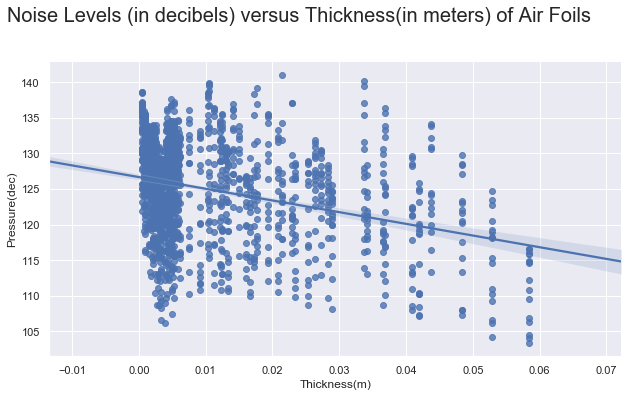

In [ ]:
g = sns.lmplot('Thickness(m)',   # x-axis
               'Pressure(dec)',# y-axis
               data=data,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(10,5)    # set the size of the figure
plt.suptitle('Noise Levels (in decibels) versus Thickness(in meters) of Air Foils', 
             size = 20, y=1.10)

Text(0, 0.5, 'Noise Levels (db)')

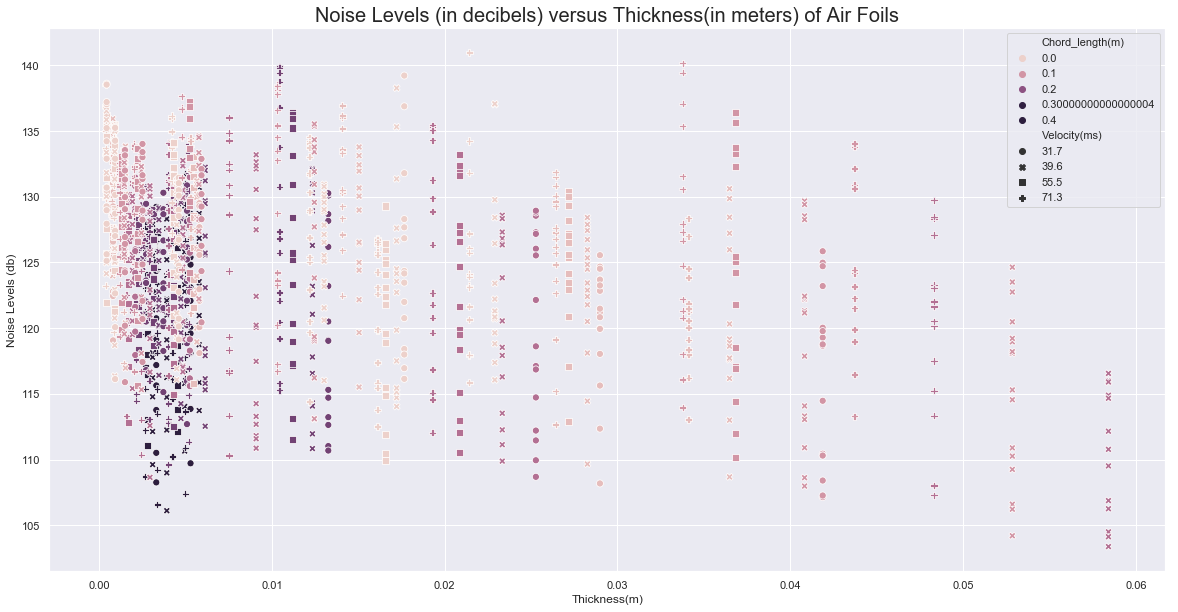

In [ ]:
sns.scatterplot(x='Thickness(m)', y='Pressure(dec)', hue = 'Chord_length(m)', data=data, s=50, style='Velocity(ms)')
plt.title('Noise Levels (in decibels) versus Thickness(in meters) of Air Foils', size=20)
plt.ylabel('Noise Levels (db)')

Text(0, 0.5, 'Noise Levels (db)')

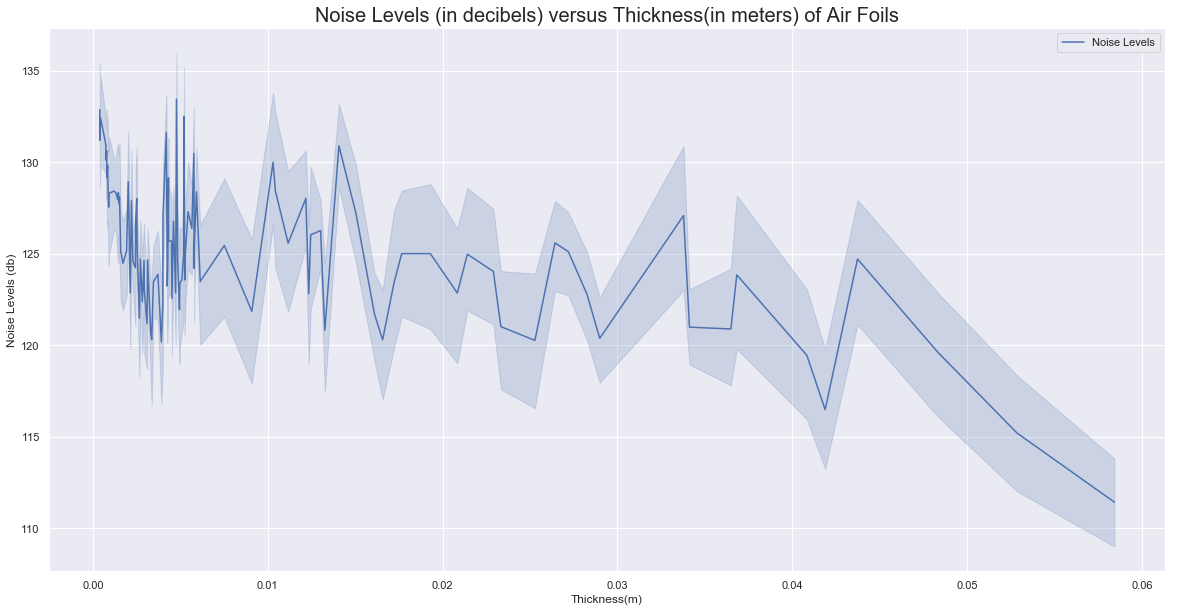

In [ ]:
sns.lineplot(x='Thickness(m)', y='Pressure(dec)', data=data, label='Noise Levels')
plt.title('Noise Levels (in decibels) versus Thickness(in meters) of Air Foils', size=20)
plt.ylabel('Noise Levels (db)')

The p-value is very low (<0.05) therefore, we reject the null hypothesis that there is a significant relationship between Thickness and noise level

## Regression

Implement a multiple regression model to determine the target variable using the given predictor variables, namely, the noise level.

Perform Multiple Regression

In [ ]:
X1 = data["Freq(Hz)"]
X2 = data["Pressure(dec)"]

Y1 = data["Velocity(ms)"]

In [ ]:
len(X2)

1503

In [ ]:
INPUT = [[X1[i], X2[i]] for i in range(len(X1))]

In [ ]:
mlr1 = linear_model.LinearRegression()
mlr1.fit(X = INPUT,y = Y1)

# intercept + coef
print("Intercept: ", mlr1.intercept_)
print("Coef", mlr1.coef_)

Intercept:  -11.184151091150149
Coef [0.00106416 0.47240667]


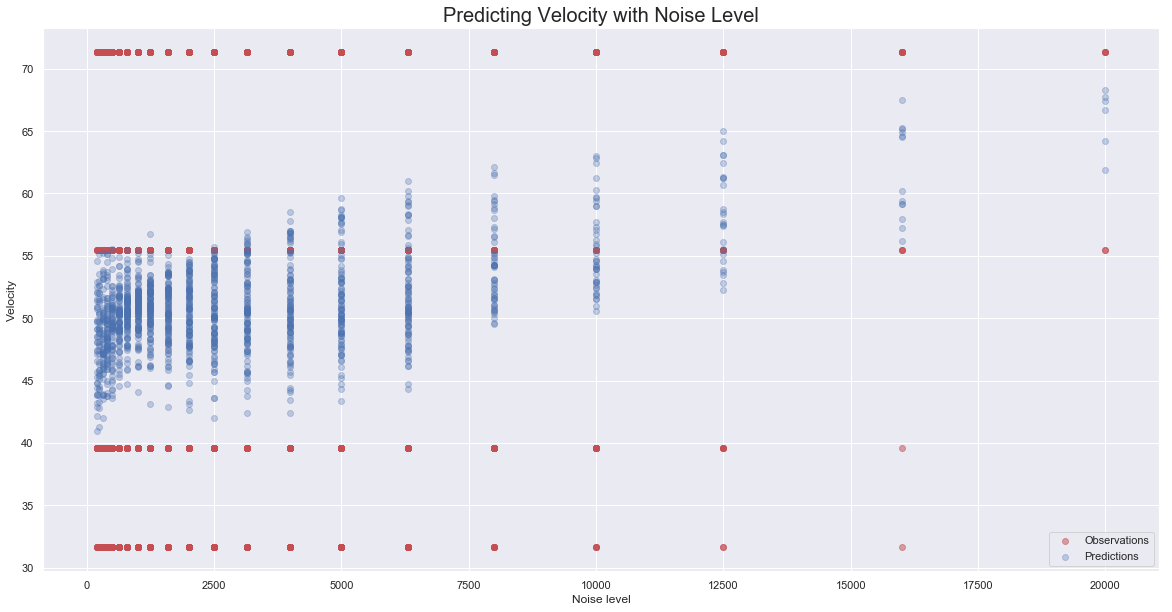

In [ ]:
plt.scatter(X1, Y1,  c="r", alpha=0.5, label="Observations") # Actual values
plt.scatter(X1, [mlr1.predict([x]) for x in INPUT], alpha=0.3, label="Predictions"); # Predicted values
plt.xlabel('Noise level')
plt.ylabel('Velocity')
plt.title('Predicting Velocity with Noise Level', size=20)
plt.legend()